In [1]:
import NNMFit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})

In [4]:
fit_res_dir_dict = {
                 "track_SAY" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/output/data_Tracks_SAY.pickle",
                 "cscd_SAY" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/output/data_Cscd_SAY.pickle",
                 "track_cscd_nohybrid_SAY" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/output/data_Tracks_Cscd_nohybrid_SAY.pickle",
                 "track_cscd_SAY" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/output/data_Tracks_Cscd_SAY.pickle",

                 "track_SAY_he_nominal" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/output/data_Tracks_SAY_he_nominal.pickle",
                 "track_cscd_nohybrid_SAY_he_nominal" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/output/data_Tracks_Cscd_nohybrid_SAY_he_nominal_local.pickle",

                 }

In [5]:
pickles = {}

for name, pickle_file_path in fit_res_dir_dict.items():
    print(name)
    pickles[name] = pd.read_pickle(pickle_file_path)
    print( "norm", pickles[name]["fit-result"][1]["astro_norm"],
           "gamma",pickles[name]["fit-result"][1]["gamma_astro"],
           "chi2", pickles[name]["fit-result"][0] )

track_SAY
norm 1.748063675275883 gamma 2.4396809047605923 chi2 4205.564784941955
cscd_SAY
norm 1.5953697373885176 gamma 2.585008753288956 chi2 240.43153732662867
track_cscd_nohybrid_SAY
norm 1.7755788207862448 gamma 2.526882998487011 chi2 4407.293163061194
track_cscd_SAY
norm 1.8669074110142572 gamma 2.5116981298688543 chi2 4459.4666720180985
track_SAY_he_nominal
norm 1.7049517411676396 gamma 2.3946196920922462 chi2 4218.334595170369
track_cscd_nohybrid_SAY_he_nominal
norm 1.795645668927821 gamma 2.5174099004674426 chi2 4420.721910363263


In [70]:
scan_dir_dict = {
                # ### best fit, should be richard naab
                 "track" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_bestfit",
                #  "cscd" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/cscd_bestfit",
                 "track_cscd_nohybrid" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_cscd_nohybrid_bestfit",
                 "track_cscd" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_cscd_bestfit",

                ### more points
                 "track_morepoints" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_bestfit_morepoints",
                 "track_cscd_nohybrid_morepoints" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_cscd_nohybrid_bestfit_morepoints",

                ### adding he event
                #  "track_he_nominal" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_he_nominal_bestfit_morepoints",
                 "track_cscd_he_nominal_nohybrid" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_cscd_he_nominal_nohybrid_bestfit_morepoints",
                 }

In [74]:
drop_unsuccessful = True

scan_dict = {}

x = {}
y = {}
dllh = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)
    x[name], y[name], dllh[name] = scan_dict[name].get_scan_xydllh(x="astro_norm",y="gamma_astro",interpolate=True, drop_unsuccessful=drop_unsuccessful)

track
track_cscd_nohybrid
track_cscd
track_morepoints
track_cscd_nohybrid_morepoints
track_cscd_he_nominal_nohybrid


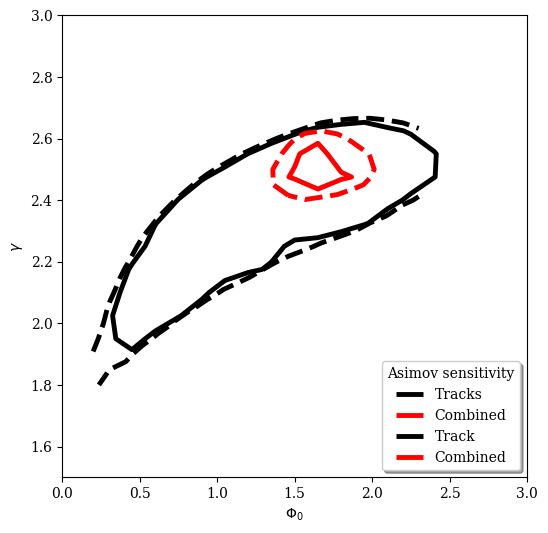

In [75]:
# compare statistics
levels = [5.99]  # 50% 2.3 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%"]

colors = ["black", "red", "black", "red"]
labels = ["Tracks", "Combined", "Track", "Combined"]
linestyles = ["-","-","--","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

for index, key in enumerate(["track", "track_cscd_nohybrid", "track_morepoints", "track_cscd_nohybrid_morepoints"]):

    cntr = ax.contour( x[key], y[key], dllh[key], 
                    levels=levels, colors=colors[index], linewidths=3.5, linestyles = linestyles[index] )

    # set the legend
    h, _ = cntr.legend_elements()
    for i in range(len(h)):
        lh.append(h[i]) # legend elements
        ll.append(f'{labels[index]}') # legend text

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right", title = "Asimov sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

/tmp/ipykernel_14739/631494073.py:24: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcm, ax=ax)
/tmp/ipykernel_14739/631494073.py:24: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcm, ax=ax)


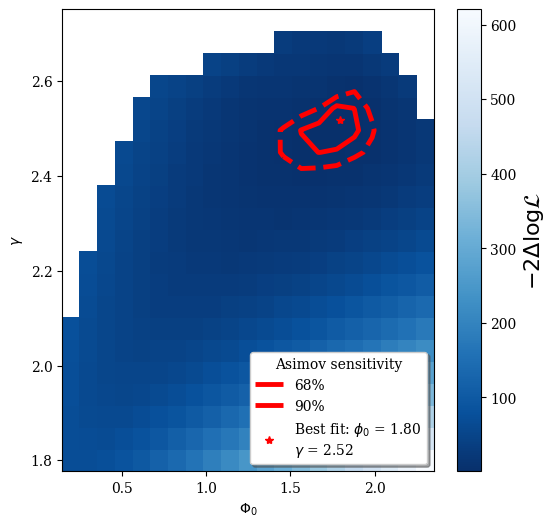

In [76]:
# heatmap ll and contour
levels = [2.27, 4.60]  # 50% 2.3 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "90%"]

linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

name = "track_cscd_he_nominal_nohybrid" # track_morepoints, track_cscd_nohybrid_morepoints track_he_nominal track_cscd_he_nominal_nohybrid 
fitname = "track_cscd_nohybrid_SAY_he_nominal" # track_SAY track_cscd_nohybrid_SAY track_SAY_he_nominal track_cscd_nohybrid_SAY_he_nominal
colors = ["red"] # black red


cntr = ax.contour( x[name], y[name], dllh[name], 
                levels=levels, colors=colors, linewidths=3.5, linestyles = linestyles )

pcm = ax.pcolor(x[name], 
                y[name], 
                dllh[name],
                cmap='Blues_r', shading='auto')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')

# best fit
norm = pickles[fitname]["fit-result"][1]["astro_norm"]
gamma = pickles[fitname]["fit-result"][1]["gamma_astro"]

dot, = ax.plot([norm], [gamma], "*", color=colors[0])

# set the legend
h, _ = cntr.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

lh.append(dot)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm:.2f}\n" + r"$\gamma$ = " + f"{gamma:.2f}")

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right", title = "Asimov sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/best_fit/llscan_contour_bestfit_{name}.pdf")

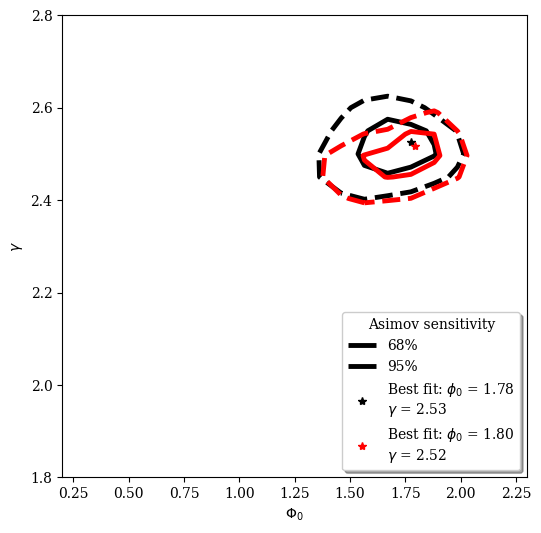

In [83]:
# compare contour
name1 = "track_cscd_nohybrid_morepoints"
fitname1 = "track_cscd_nohybrid_SAY"

name2 = "track_cscd_he_nominal_nohybrid"
fitname2 = "track_cscd_nohybrid_SAY_he_nominal"


levels = [2.3,5.99]  # 50% 2.3 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "95%"]

colors = ["black", "red", "black", "red"]
labels = ["Without HE", "With HE"]
linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

cntr1 = ax.contour( x[name1], y[name1], dllh[name1], 
                levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles )

cntr2 = ax.contour( x[name2], y[name2], dllh[name2], 
                levels=levels, colors=colors[1], linewidths=3.5, linestyles = linestyles )

# best fit
norm1 = pickles[fitname1]["fit-result"][1]["astro_norm"]
gamma1 = pickles[fitname1]["fit-result"][1]["gamma_astro"]

dot1, = ax.plot([norm1], [gamma1], "*", color=colors[0])

# best fit
norm2 = pickles[fitname2]["fit-result"][1]["astro_norm"]
gamma2 = pickles[fitname2]["fit-result"][1]["gamma_astro"]

dot2, = ax.plot([norm2], [gamma2], "*", color=colors[1])


# set the legend
h, _ = cntr1.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

lh.append(dot1)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm1:.2f}\n" + r"$\gamma$ = " + f"{gamma1:.2f}")

lh.append(dot2)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm2:.2f}\n" + r"$\gamma$ = " + f"{gamma2:.2f}")


ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right", title = "Asimov sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/best_fit/compare_contour_bestfit_{name1}-{name2}.pdf")